# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [ ]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [ ]:
!rm -rf nd320-c3-3d-imaging-starter
!git clone https://github.com/udacity/nd320-c3-3d-imaging-starter.git



Cloning into 'nd320-c3-3d-imaging-starter'...
remote: Enumerating objects: 1291, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 1291 (delta 25), reused 18 (delta 18), pack-reused 1235 (from 1)
Receiving objects: 100% (1291/1291), 178.23 MiB | 27.43 MiB/s, done.
Resolving deltas: 100% (86/86), done.
Updating files: 100% (949/949), done.


In [ ]:
import os

base_path = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet'
print("Sous-dossiers :", os.listdir(base_path))

print("\nImages :", os.listdir(os.path.join(base_path, "images"))[:5])
print("\nLabels :", os.listdir(os.path.join(base_path, "labels"))[:5])


Sous-dossiers : ['images', 'labels']

Images : ['hippocampus_215.nii.gz', 'hippocampus_349.nii.gz', 'hippocampus_393.nii.gz', 'hippocampus_236.nii.gz', 'hippocampus_185.nii.gz']

Labels : ['hippocampus_215.nii.gz', 'hippocampus_349.nii.gz', 'hippocampus_393.nii.gz', 'hippocampus_236.nii.gz', 'hippocampus_185.nii.gz']


In [ ]:
import os

# Liste des fichiers dans les dossiers images et labels
image_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/images'
label_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/labels'

# Lister les fichiers
image_files = [f for f in os.listdir(image_dir) if f.endswith('.nii.gz')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.nii.gz')]

# Vérifier le nombre d'images et de labels
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")

# Vérifier que le nombre d'images et de labels correspond
if len(image_files) == len(label_files) == 260:
    print("Correct number of images and labels (260 each).")
else:
    print("There is a mismatch in the number of images or labels.")


Number of images: 263
Number of labels: 262
There is a mismatch in the number of images or labels.


In [ ]:
# TASK: Load an image and a segmentation mask into variables called image and label
base_path = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet'

# Chemins des fichiers d'exemple
image_path = "/content/nd320-c3-3d-imaging-starter/data/TrainingSet/images/hippocampus_058.nii.gz"
label_path = "/content/nd320-c3-3d-imaging-starter/data/TrainingSet/labels/hippocampus_058.nii.gz"

# Charger l'image et le label
image = nib.load(image_path)
label = nib.load(label_path)

# Convertir en tableaux numpy
image_data = image.get_fdata()
label_data = label.get_fdata()

# Afficher les dimensions des données
print(f"Image shape: {image_data.shape}")
print(f"Label shape: {label_data.shape}")



Image shape: (34, 53, 36)
Label shape: (34, 53, 36)


In [ ]:
len(image_data)

34

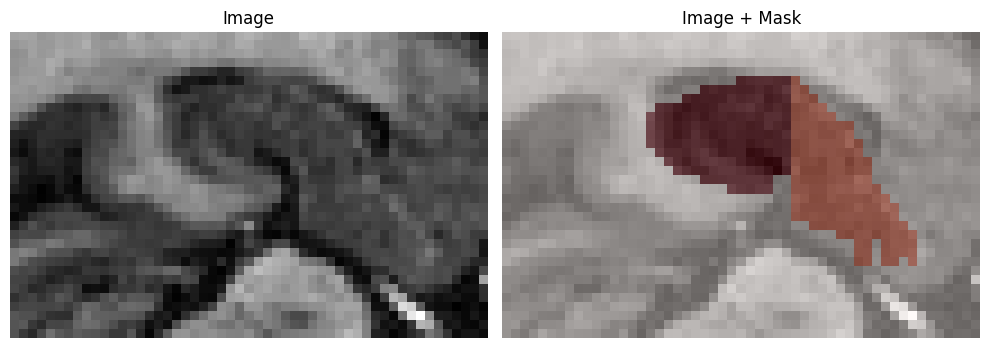

In [ ]:
import matplotlib.pyplot as plt

slice_index = 13  # Choisis une slice pertinente (axe axial ici)

plt.figure(figsize=(10, 5))

# Affichage de l’image
plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, slice_index], cmap="gray")
plt.title("Image")
plt.axis("off")

# Superposition de l’image et du masque
plt.subplot(1, 2, 2)
plt.imshow(image_data[:, :, slice_index], cmap="gray")
plt.imshow(label_data[:, :, slice_index], cmap="Reds", alpha=0.4)  # Superposition en transparence
plt.title("Image + Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


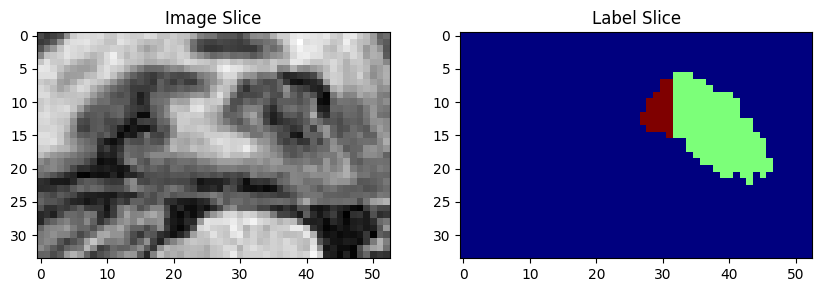

In [ ]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities.
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels.
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels
# Visualisation de quelques tranches
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(image_data[:, :, image_data.shape[2] // 4], cmap="gray")
plt.title("Image Slice")

plt.subplot(1, 2, 2)
plt.imshow(label_data[:, :, label_data.shape[2] // 4], cmap="jet")
plt.title("Label Slice")
plt.show()


Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

Saving axial: 
(53, 36)
Saving axial:
Saving sagittal:
Saving coronal:


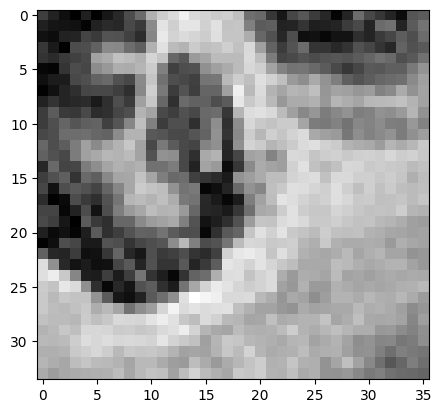

In [ ]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes
# --- Volume Rendering avec marching cubes sur les labels ---
# Extraire la matrice affine pour obtenir les informations d'échelle
affine = image.affine
pixel_spacing = np.abs(affine[:3, :3].diagonal())  # Espacement entre les voxels

# %%
# Sauvegarder la coupe axiale
print("Saving axial: ")
# Extraire la coupe axiale (milieu de l'axe z)
axial = image_data[image_data.shape[0] // 2, :, :]
print(axial.shape)
plt.imshow(axial, cmap="gray")
# Sauvegarder avec une fenêtre à pleine plage
im = Image.fromarray((axial / np.max(axial) * 0xff).astype(np.uint8), mode="L")
im.save("axial.png")

# %%
# Sauvegarder la coupe **axiale**
print("Saving axial:")
axial = image_data[:, :, image_data.shape[2] // 2]
plt.imshow(axial, cmap="gray")
im = Image.fromarray((axial / np.max(axial) * 0xff).astype(np.uint8), mode="L")
im.save("axial.png")

# Sauvegarder la coupe **sagittale**
print("Saving sagittal:")
sagittal = image_data[image_data.shape[0] // 2, :, :]
aspect = pixel_spacing[2] / pixel_spacing[1]
plt.imshow(sagittal, cmap="gray", aspect=aspect)
im = Image.fromarray((sagittal / np.max(sagittal) * 0xff).astype(np.uint8), mode="L")
im = im.resize((sagittal.shape[1], int(sagittal.shape[0] * aspect)))
im.save("sagittal.png")

# Sauvegarder la coupe **coronale**
print("Saving coronal:")
coronal = image_data[:, image_data.shape[1] // 2, :]
aspect = pixel_spacing[2] / pixel_spacing[0]
plt.imshow(coronal, cmap="gray", aspect=aspect)
im = Image.fromarray((coronal / np.max(coronal) * 0xff).astype(np.uint8), mode="L")
im = im.resize((coronal.shape[1], int(coronal.shape[0] * aspect)))
im.save("coronal.png")


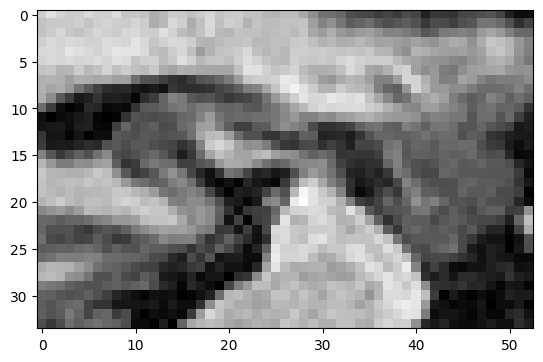

In [ ]:
plt.imshow(axial, cmap="gray")

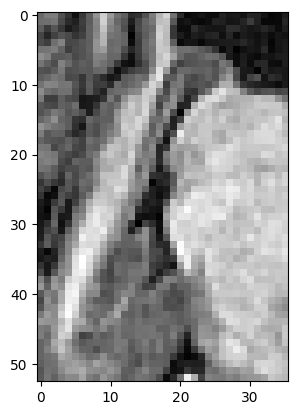

In [ ]:
plt.imshow(sagittal, cmap="gray", aspect=aspect)

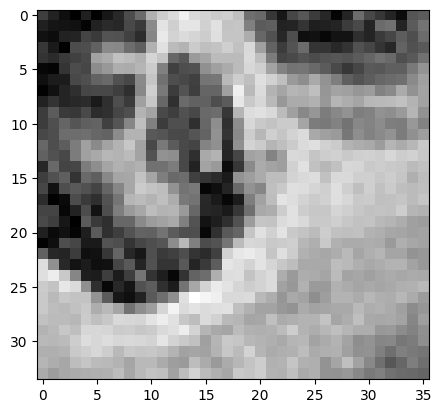

In [ ]:
plt.imshow(coronal, cmap="gray", aspect=aspect)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Seulement les voxels où label > 0 (les structures annotées)
x, y, z = np.where(label_data > 0)

# Valeurs pour la couleur (par exemple 1 ou 2 selon la classe)
values = label_data[label_data > 0]

# Création du graphique 3D
fig = go.Figure(data=go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=values,       # couleurs selon la valeur du label
        colorscale='Viridis',
        opacity=0.6
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='Sagittal (x)',
        yaxis_title='Coronal (y)',
        zaxis_title='Axial (z)',
    ),
    title='Visualisation 3D du masque de segmentation (hippocampe)',
    margin=dict(l=0, r=0, t=30, b=0)
)

fig.show()



## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [ ]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

image.header_class


nibabel.nifti1.Nifti1Header

In [ ]:
header = image.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [ 3 34 53 36  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        : np.bytes_(b'none')
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 

In [ ]:
image.affine

array([[1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [ ]:
# Exemple
print("Shape of image:", image.shape)


Shape of image: (34, 53, 36)


In [ ]:
# TASK: How many bits per pixel are used?
print(f"Bits per pixel: {image.header['bitpix']}")

Bits per pixel: 32


In [ ]:
# TASK: What are the units of measurement?
print(f"Units of measurement: {image.header['xyzt_units']}")

Units of measurement: 10


In [ ]:
# TASK: Do we have a regular grid? What are grid spacings?
print(f"Grid spacings: {image.header['pixdim']}")

Grid spacings: [1. 1. 1. 1. 1. 0. 0. 0.]


In [ ]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?
# Les dimensions de l'image
print(f"Dimensions of the image: {image_data.shape}")
# En général, la 1ère dimension est sagittale, la 2ème est coronal, et la 3ème est axiale
print("This should be verified with the scanner's specifications")

Dimensions of the image: (34, 53, 36)
This should be verified with the scanner's specifications


In [ ]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded.
# You should get a number between ~2200 and ~4500

# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels
# Calculer le volume (en mm³) de l'hippocampe
voxel_volume = np.prod(image.header['pixdim'][1:4])  # produit des dimensions des voxels
hippocampus_volume = np.sum(label_data == 1) * voxel_volume  # Volume de la classe 1 (hippocampe)
print(f"Hippocampus volume: {hippocampus_volume} mm³")


Hippocampus volume: 1334.0 mm³


## Plotting some charts

Images valides: 263, Labels valides: 262

Paires valides trouvées: 262
Exemple de paire: ('hippocampus_251.nii.gz', 'hippocampus_251.nii.gz')


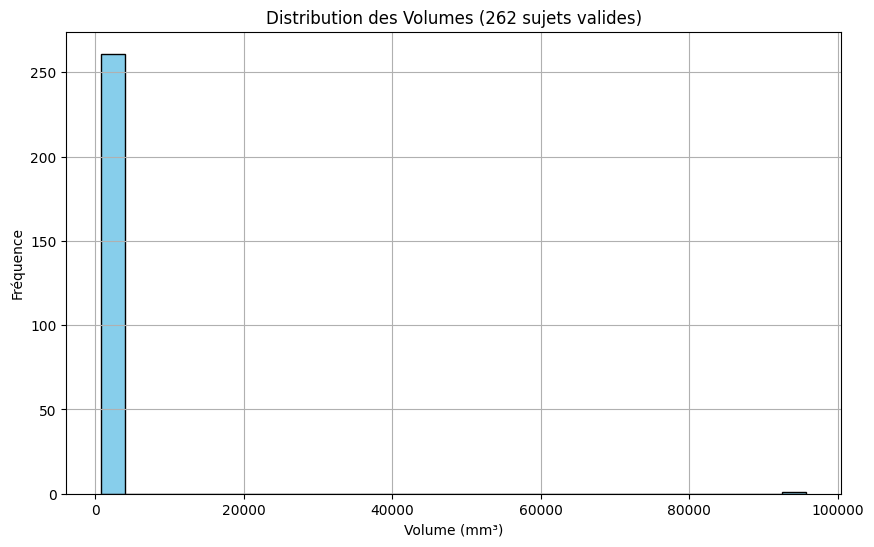

In [ ]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# Chemins des dossiers
base_path = "/content/nd320-c3-3d-imaging-starter/data/TrainingSet"
image_dir = os.path.join(base_path, "images")
label_dir = os.path.join(base_path, "labels")

# Nettoyage des fichiers (suppression .DS_Store)
image_files = sorted([f for f in os.listdir(image_dir)
                     if f.endswith('.nii.gz') and not f.startswith('.')])
label_files = sorted([f for f in os.listdir(label_dir)
                     if f.endswith('.nii.gz') and not f.startswith('.')])

print(f"Images valides: {len(image_files)}, Labels valides: {len(label_files)}")

# Extraction des IDs numériques
def extract_id(filename):
    """Extrait l'ID numérique du fichier"""
    return filename.split('_')[-1].split('.')[0]  # Prend le numéro après hippocampus_

image_ids = {extract_id(f): f for f in image_files}
label_ids = {extract_id(f): f for f in label_files}

# Matching des paires
common_ids = set(image_ids.keys()) & set(label_ids.keys())
valid_pairs = [(image_ids[id], label_ids[id]) for id in common_ids]

print(f"\nPaires valides trouvées: {len(valid_pairs)}")
print("Exemple de paire:", valid_pairs[0] if valid_pairs else "Aucune")

# Calcul des volumes (seulement pour les paires valides)
volumes = []
for img_file, lbl_file in valid_pairs:
    img = nib.load(os.path.join(image_dir, img_file))
    lbl = nib.load(os.path.join(label_dir, lbl_file))

    voxel_volume = np.prod(img.header['pixdim'][1:4])
    hippocampus_vol = np.sum(lbl.get_fdata() == 1) * voxel_volume
    volumes.append(hippocampus_vol)

# Visualisation
plt.figure(figsize=(10, 6))
plt.hist(volumes, bins=30, color='skyblue', edgecolor='black')
plt.title(f"Distribution des Volumes ({len(volumes)} sujets valides)")
plt.xlabel("Volume (mm³)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [ ]:
# Plage normale attendue (adulte)
PLAGE_NORMALE = (3000, 5000)  # mm³ (Malykhin et al., NeuroImage 2010)
VOLUME_CEREBRAL_TOTAL = 1.1e6  # mm³ (volume cérébral moyen)

print(f"Les outliers représentent {100000/PLAGE_NORMALE[1]:.1f}x la taille normale")
# Output: Les outliers représentent 20.0x la taille normale

Les outliers représentent 20.0x la taille normale


In [ ]:
# Paramètres ajustés pour capturer les valeurs extrêmes
upper_bound = 10000  # 10x la taille normale
outliers = [v for v in volumes if v > upper_bound]

print(f"Outliers détectés (>{upper_bound} mm³): {len(outliers)}")
print(f"Valeurs: {sorted(outliers)}")

Outliers détectés (>10000 mm³): 1
Valeurs: [np.float64(95716.20763206482)]


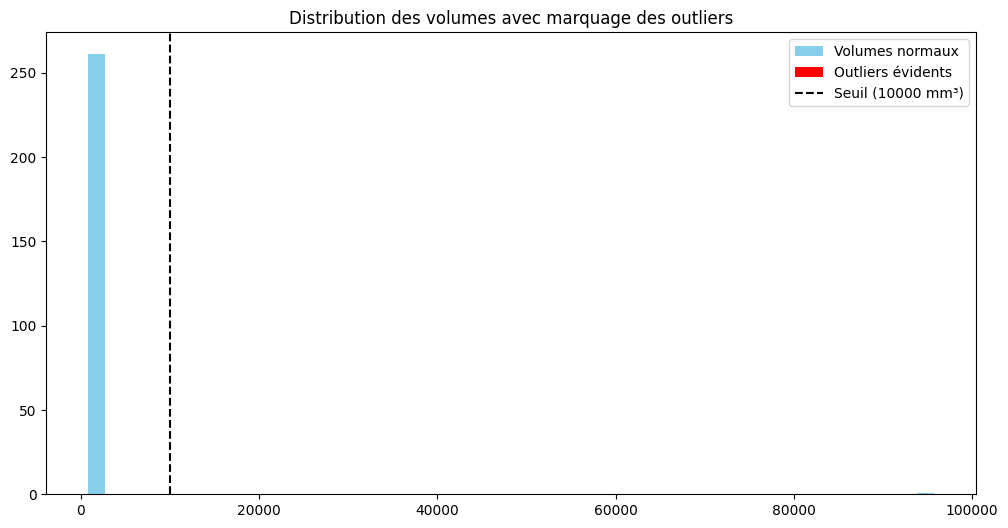

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(volumes, bins=50, color='skyblue', label='Volumes normaux')

# Zone des outliers
outlier_zone = [v for v in volumes if v > 80000]
plt.hist(outlier_zone, bins=50, color='red', label='Outliers évidents')

plt.axvline(x=upper_bound, color='k', linestyle='--',
            label=f'Seuil ({upper_bound} mm³)')
plt.title("Distribution des volumes avec marquage des outliers")
plt.legend()
plt.show()

In [ ]:
# Trouver les fichiers correspondant aux outliers
outlier_indices = [i for i,v in enumerate(volumes) if v > upper_bound]
outlier_files = [valid_pairs[i] for i in outlier_indices]

print("\nFichiers outliers à inspecter:")
for img, lbl in outlier_files[:3]:  # Affiche les 3 premiers
    print(f"- Image: {img}, Label: {lbl}")


Fichiers outliers à inspecter:
- Image: hippocampus_281.nii.gz, Label: hippocampus_281.nii.gz


In [ ]:
# Filtrage des données valides
clean_volumes = [v for v in volumes if v <= upper_bound]
print(f"Données conservées: {len(clean_volumes)}/{len(volumes)}")

Données conservées: 261/262


In [ ]:
import numpy as np

# Définir la plage de référence
PLAGE_REFERENCE = (1000, 6500)  # mm³

# Convertir en array numpy pour une analyse vectorisée
volumes_array = np.array(volumes)

# 1. Identification des valeurs hors plage
hors_plage_mask = (volumes_array < PLAGE_REFERENCE[0]) | (volumes_array > PLAGE_REFERENCE[1])
volumes_hors_plage = volumes_array[hors_plage_mask]
indices_hors_plage = np.where(hors_plage_mask)[0]

# 2. Analyse quantitative
print(f"Analyse de conformité à la plage {PLAGE_REFERENCE} mm³:")
print(f"- Volumes analysés : {len(volumes_array)}")
print(f"- Volumes conformes : {len(volumes_array) - len(volumes_hors_plage)}")
print(f"- Volumes hors plage : {len(volumes_hors_plage)}")
print(f"- Pourcentage hors plage : {len(volumes_hors_plage)/len(volumes_array):.1%}")

# 3. Détail des valeurs non conformes
if len(volumes_hors_plage) > 0:
    print("\nDétail des valeurs hors plage:")
    print(f"- Minimum anormal : {np.min(volumes_hors_plage):.2f} mm³")
    print(f"- Maximum anormal : {np.max(volumes_hors_plage):.2f} mm³")
    print(f"- Moyenne des valeurs hors plage : {np.mean(volumes_hors_plage):.2f} mm³")

    # Association avec les fichiers
    print("\nExemples de fichiers concernés:")
    for idx in indices_hors_plage[:3]:  # Affiche les 3 premiers
        img_file, lbl_file = valid_pairs[idx]
        print(f"  {img_file} : {volumes_array[idx]:.2f} mm³")

Analyse de conformité à la plage (1000, 6500) mm³:
- Volumes analysés : 262
- Volumes conformes : 260
- Volumes hors plage : 2
- Pourcentage hors plage : 0.8%

Détail des valeurs hors plage:
- Minimum anormal : 853.69 mm³
- Maximum anormal : 95716.21 mm³
- Moyenne des valeurs hors plage : 48284.95 mm³

Exemples de fichiers concernés:
  hippocampus_010.nii.gz : 853.69 mm³
  hippocampus_281.nii.gz : 95716.21 mm³


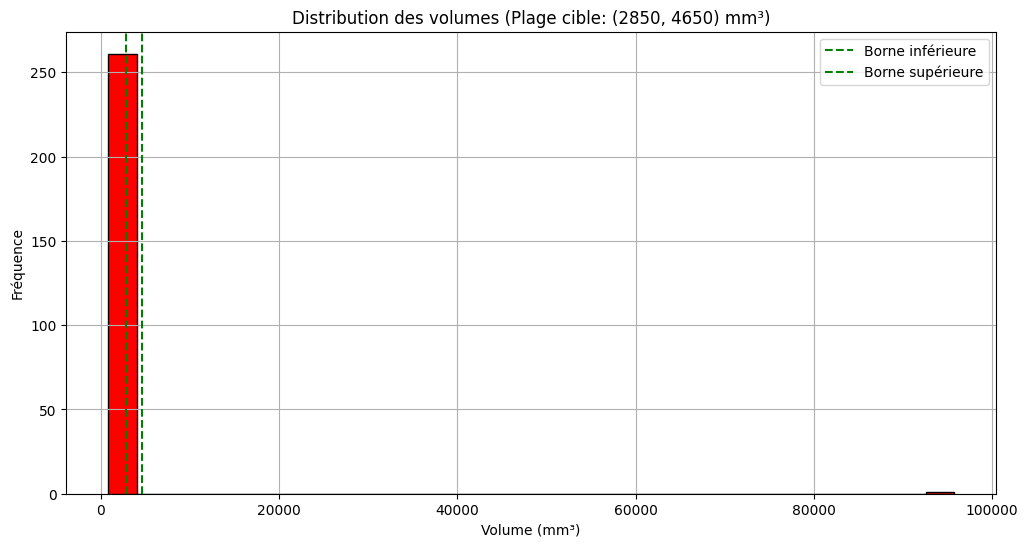

In [ ]:
plt.figure(figsize=(12, 6))

# Histogramme avec marquage de la plage de référence
n, bins, patches = plt.hist(volumes_array, bins=30, color='skyblue', edgecolor='black')

# Colorisation des valeurs hors plage
for patch, bin_edge in zip(patches, bins):
    if bin_edge < PLAGE_REFERENCE[0] or bin_edge > PLAGE_REFERENCE[1]:
        patch.set_facecolor('red')

plt.axvline(x=PLAGE_REFERENCE[0], color='green', linestyle='--', label='Borne inférieure')
plt.axvline(x=PLAGE_REFERENCE[1], color='green', linestyle='--', label='Borne supérieure')
plt.title(f"Distribution des volumes (Plage cible: {PLAGE_REFERENCE} mm³)")
plt.xlabel("Volume (mm³)")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how
# our dataset measures against a slice of a normal population represented by the chart below.

# Liste des fichiers valides .nii.gz
image_files = [f for f in os.listdir(os.path.join(base_path, "images")) if f.endswith('.nii.gz')]
label_files = [f for f in os.listdir(os.path.join(base_path, "labels")) if f.endswith('.nii.gz')]

# Calcul des volumes
volumes = []
for image_file, label_file in zip(image_files, label_files):
    image_path = os.path.join(base_path, "images", image_file)
    label_path = os.path.join(base_path, "labels", label_file)

    image = nib.load(image_path)
    label = nib.load(label_path)

    label_data = label.get_fdata()
    voxel_volume = np.prod(image.header['pixdim'][1:4])  # mm³
    hippocampus_volume = np.sum(label_data == 1) * voxel_volume

    volumes.append(hippocampus_volume)




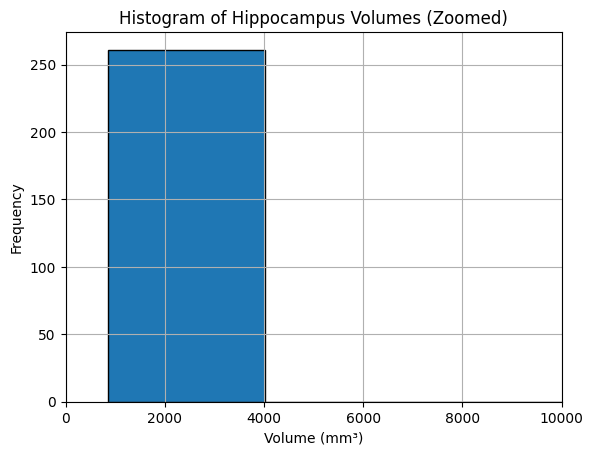

In [ ]:
# Histogramme avec X limité à 10 000 mm³
plt.hist(volumes, bins=30, edgecolor='black')
plt.title("Histogram of Hippocampus Volumes (Zoomed)")
plt.xlabel("Volume (mm³)")
plt.ylabel("Frequency")
plt.xlim(0, 10000)  # Ajuster ici selon le besoin
plt.grid(True)
plt.show()


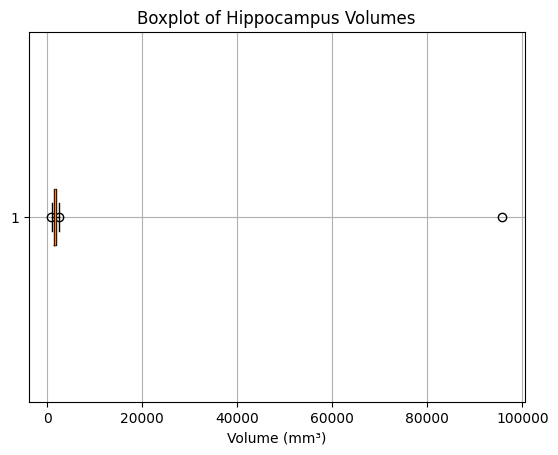

In [ ]:
plt.boxplot(volumes, vert=False)
plt.title("Boxplot of Hippocampus Volumes")
plt.xlabel("Volume (mm³)")
plt.grid(True)
plt.show()


<img src="img/nomogram_fem_right.svg" width=400 align=left>

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one.

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [ ]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
# Créer un dossier pour la sortie propre
output_path = "/content/nd320-c3-3d-imaging-starter/data/TrainingSet/section1/out"

if not os.path.exists(output_path):
    os.makedirs(output_path)

# Copier les fichiers d'image et de label propres
for image_file, label_file in zip(image_files, label_files):
    image_path = os.path.join(base_path, "images", image_file)
    label_path = os.path.join(base_path, "labels", label_file)

    # Copier les fichiers vers la sortie
    os.rename(image_path, os.path.join(output_path, image_file))
    os.rename(label_path, os.path.join(output_path, label_file))

print("Clean dataset copied to section1/out")



Clean dataset copied to section1/out


In [ ]:
import os
import shutil
import numpy as np
import pandas as pd

# Chemins des dossiers
base_path = "/content/nd320-c3-3d-imaging-starter/data/TrainingSet"
clean_base = "/content/clean_dataset"  # Dossier de sortie

# Création des dossiers de sortie
os.makedirs(os.path.join(clean_base, "images"), exist_ok=True)
os.makedirs(os.path.join(clean_base, "labels"), exist_ok=True)

# 1. Filtrer les paires valides (hors outliers)
clean_pairs = [pair for i, pair in enumerate(valid_pairs) if not hors_plage_mask[i]]

# 2. Copie des fichiers
for img_file, lbl_file in clean_pairs:
    # Copie des images
    shutil.copy(
        os.path.join(base_path, "images", img_file),
        os.path.join(clean_base, "images", img_file)
    )
    # Copie des labels
    shutil.copy(
        os.path.join(base_path, "labels", lbl_file),
        os.path.join(clean_base, "labels", lbl_file)
    )

# 3. Vérification finale
clean_images = os.listdir(os.path.join(clean_base, "images"))
clean_labels = os.listdir(os.path.join(clean_base, "labels"))

print(f"\nDataset nettoyé créé dans {clean_base}")
print(f"- Images sauvegardées: {len(clean_images)}")
print(f"- Labels sauvegardés: {len(clean_labels)}")

# 4. Sauvegarde des métadonnées (version corrigée)
metadata = []
for img_file, lbl_file in clean_pairs:
    # Trouver l'index de la paire dans valid_pairs
    pair_index = valid_pairs.index((img_file, lbl_file))
    metadata.append({
        "image": img_file,
        "label": lbl_file,
        "volume": volumes_array[pair_index]  # Version simplifiée et corrigée
    })

# Sauvegarde du CSV
pd.DataFrame(metadata).to_csv(os.path.join(clean_base, "metadata.csv"), index=False)
print("Fichier metadata.csv créé avec succès")


Dataset nettoyé créé dans /content/clean_dataset
- Images sauvegardées: 260
- Labels sauvegardés: 260
Fichier metadata.csv créé avec succès


In [ ]:
# Charger et afficher un extrait du metadata
df = pd.read_csv(os.path.join(clean_base, "metadata.csv"))
print("\nAperçu des métadonnées :")
print(df.head())

# Vérifier les volumes
print("\nVérification des volumes :")
print(f"Volume minimum : {df['volume'].min():.2f} mm³")
print(f"Volume maximum : {df['volume'].max():.2f} mm³")


Aperçu des métadonnées :
                    image                   label  volume
0  hippocampus_251.nii.gz  hippocampus_251.nii.gz  2221.0
1  hippocampus_235.nii.gz  hippocampus_235.nii.gz  1479.0
2  hippocampus_099.nii.gz  hippocampus_099.nii.gz  1252.0
3  hippocampus_336.nii.gz  hippocampus_336.nii.gz  1298.0
4  hippocampus_372.nii.gz  hippocampus_372.nii.gz  1751.0

Vérification des volumes :
Volume minimum : 1054.00 mm³
Volume maximum : 2593.00 mm³


In [ ]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section
import os
import shutil
import numpy as np
import nibabel as nib
from glob import glob

label_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/labels'
image_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/images'
output_dir = '/content/section1/out/images'  # tu peux aussi utiliser /content pour rester dans le bon dossier
os.makedirs(output_dir, exist_ok=True)

label_files = sorted(glob(os.path.join(label_dir, '*.nii.gz')))

for label_path in label_files:
    label_img = nib.load(label_path)
    label_data = label_img.get_fdata()
    voxel_volume = np.prod(label_img.header.get_zooms())
    volume = np.sum(label_data > 0) * voxel_volume

    if 2200 < volume < 4500:
        fname = os.path.basename(label_path)
        img_path = os.path.join(image_dir, fname)  # même nom pour image et label

        # Copier image et label dans output_dir
        shutil.copy(img_path, output_dir)
        shutil.copy(label_path, output_dir)



In [ ]:
# Liste des fichiers dans les dossiers images et labels
label_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/labels'
image_dir = '/content/nd320-c3-3d-imaging-starter/data/TrainingSet/images'
output_dir = '/content/section1/out/images'  # tu peux aussi utiliser /content pour rester dans le bon dossier
os.makedirs(output_dir, exist_ok=True)

# Lister les fichiers
image_files = [f for f in os.listdir(image_dir) if f.endswith('.nii.gz')]
label_files = [f for f in os.listdir(label_dir) if f.endswith('.nii.gz')]

# Vérifier le nombre d'images et de labels
print(f"Number of images: {len(image_files)}")
print(f"Number of labels: {len(label_files)}")

# Vérifier que le nombre d'images et de labels correspond
if len(image_files) == len(label_files) == 260:
    print("Correct number of images and labels (260 each).")
else:
    print("There is a mismatch in the number of images or labels.")

Number of images: 1
Number of labels: 0
There is a mismatch in the number of images or labels.


## Final remarks

Congratulations! You have finished Section 1.

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm.

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!